In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score, classification_report

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer, MinMaxScaler, LabelEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('train.csv')

In [130]:
df_fEng = pd.read_csv('train_fEng.csv')
df_fEng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    float64
 5   Age             891 non-null    float64
 6   SibSp           891 non-null    float64
 7   Parch           891 non-null    float64
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Cabin           204 non-null    object 
 11  Embarked        889 non-null    object 
 12  0.0_to_41.0     890 non-null    float64
 13  41.0_to_99.0    890 non-null    float64
 14  99.0_to_185.0   890 non-null    float64
 15  185.0_to_375.0  890 non-null    float64
 16  375.0_to_512.0  890 non-null    float64
 17  Title           891 non-null    obj

In [131]:
y = df_fEng['Survived']
X = df_fEng.drop(['Age','PassengerId','SibSp', 'Parch', 'Embarked', 'Ticket', 'Survived', '0.0_to_41.0', '41.0_to_99.0', '99.0_to_185.0', '185.0_to_375.0', '375.0_to_512.0', 'Title', 'Name', 'Cabin'],  axis=1)

In [132]:
X

,Pclass,Sex,Fare,Priority,Age_group
0,3,0.0,7.2500,3,5
1,1,1.0,71.2833,1,4
2,3,1.0,7.9250,1,5
3,1,1.0,53.1000,1,4
4,3,0.0,8.0500,3,4
...,...,...,...,...,...
886,2,0.0,13.0000,2,5
887,1,1.0,30.0000,1,5
888,3,1.0,23.4500,1,5
889,1,0.0,30.0000,3,5


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 10)

In [134]:
X_train.shape, y_train.shape

((712, 5), (712,))

In [135]:
X_test.shape, y_test.shape

((179, 5), (179,))

## Decision Tree

In [136]:
m = DecisionTreeClassifier(splitter='random', max_depth= 20)
m.fit(X_train, y_train)
print(f'score from Decision tree on train dataset: {round(m.score(X_train, y_train),3)}')

score from Decision tree on train dataset: 0.94


In [137]:
print(f'score from Decision tree on test dataset: {round(m.score(X_test, y_test),3)}')

score from Decision tree on test dataset: 0.821


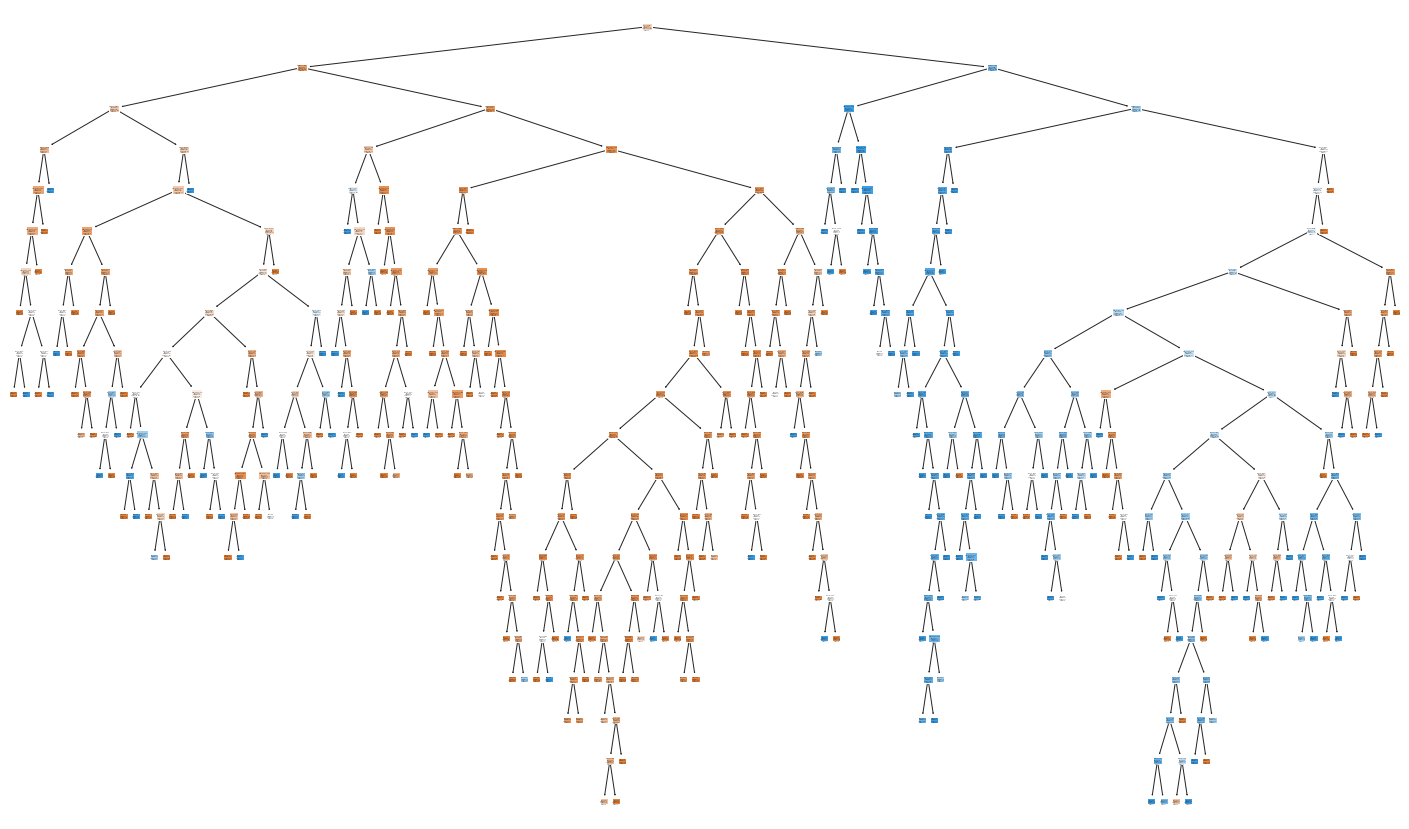

In [139]:
plt.figure(figsize = (25,15))
t = plot_tree(m, feature_names = ['Pclass', 'Sex', 'Fare', 'Priority', 'Age_group'], class_names=['0', '1'], filled=True)

In [143]:
X_test.shape

(179, 5)

## Random Forest

In [144]:
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=20)
rf.fit(X_train, y_train)
print(f'score from Random Forest on train dataset: {round(rf.score(X_train, y_train),3)}')

score from Random Forest on train dataset: 0.94


In [145]:
print(f'score from Random Forest on test dataset: {round(rf.score(X_test,y_test),3)}')

score from Random Forest on test dataset: 0.855


In [146]:
y_train.shape

(712,)

## Understanding overfitting problem and max depth

## Tree

In [16]:
from sklearn.datasets import make_classification
import random

random_state = 123
times = 33
samples = 100000
features = 50
proportion_informative = 0.8
proportion_missing = 0.1
proportion_w_nose = 0.8

output_tree = []
output_rf = []

In [17]:
# build initial fully grown tree
initial_tree = DecisionTreeClassifier(max_features="sqrt", random_state=random_state,)
initial_tree_fit = initial_tree.fit(X_train, y_train)

In [32]:
# get max depth
max_depth = initial_tree_fit.tree_.max_depth
# construct depth grid
list_depths = np.arange(1, max_depth, 1).tolist()
depth_pct = [100] + [(n / max_depth) * 100 for n in list_depths]
max_depth

28

In [19]:
list_trees = [initial_tree_fit]
for depth in list_depths:
    tmptree = DecisionTreeClassifier(max_depth=depth, max_features="sqrt", random_state=random_state)
    list_trees.append(tmptree.fit(X_train, y_train))

In [96]:
train_accuracy = []
test_accuracy = []

In [97]:
for tree in list_trees:
    yhat_train = tree.predict(X_train)
    yhat_test = tree.predict(X_test)
    train_accuracy.append(accuracy_score(y_train, yhat_train))
    test_accuracy.append(accuracy_score(y_test, yhat_test))

# save to pandas df
df_t = pd.DataFrame(list(zip(depth_pct, train_accuracy, test_accuracy)),
        columns=["depth", "train_accuracy", "test_accuracy"])
output_tree.append(df_t)

In [98]:
df_t

,depth,train_accuracy,test_accuracy
0,100.000000,1.00000,0.76212
1,3.571429,0.60366,0.60126
2,7.142857,0.62184,0.62216
3,10.714286,0.65556,0.65118
4,14.285714,0.68858,0.68190
5,17.857143,0.69712,0.68884
6,21.428571,0.72992,0.71432
7,25.000000,0.74258,0.72316
8,28.571429,0.75830,0.72714
9,32.142857,0.79894,0.75804


## Forest

In [99]:
# build initial forest
initial_forest = RandomForestClassifier(max_features="sqrt", random_state=random_state)
initial_forest_fit = initial_forest.fit(X_train, y_train)

In [100]:
# get max depth
max_depth_rf = max([estimator.get_depth() for estimator in initial_forest_fit.estimators_])
max_depth_rf

34

In [101]:
# construct depth grid
list_depths_rf = np.arange(1, 28, 1).tolist()
depth_pct_rf = [100] + [(n / 28) * 100 for n in list_depths_rf]

In [ ]:
# fit rf with smaller depth
list_forests = [initial_forest_fit]

for depth in list_depths_rf:
    tmp_forest = RandomForestClassifier(max_features="sqrt", max_depth=depth, random_state=random_state)
    list_forests.append(tmp_forest.fit(X_train, y_train))

In [ ]:
train_accuracy_rf = []
test_accuracy_rf = []

for forest in list_forests:
    # get accuracy for the forest
    forest_train = forest.predict(X_train)
    forest_test = forest.predict(X_test)
    train_accuracy_rf.append(accuracy_score(y_train, forest_train))
    test_accuracy_rf.append(accuracy_score(y_test, forest_test))

df_rf = pd.DataFrame(list(zip(depth_pct_rf, train_accuracy_rf, test_accuracy_rf)),
        columns=["depth", "train_accuracy", "test_accuracy"])
output_rf.append(df_rf)

In [103]:
df_rf

,depth,train_accuracy,test_accuracy
0,100.000000,1.00000,0.94480
1,3.571429,0.73340,0.73244
2,7.142857,0.75806,0.75468
3,10.714286,0.79788,0.78978
4,14.285714,0.82268,0.81676
5,17.857143,0.84948,0.83744
6,21.428571,0.87566,0.86300
7,25.000000,0.90078,0.88142
8,28.571429,0.92430,0.89764
9,32.142857,0.94604,0.91022


## Findings:

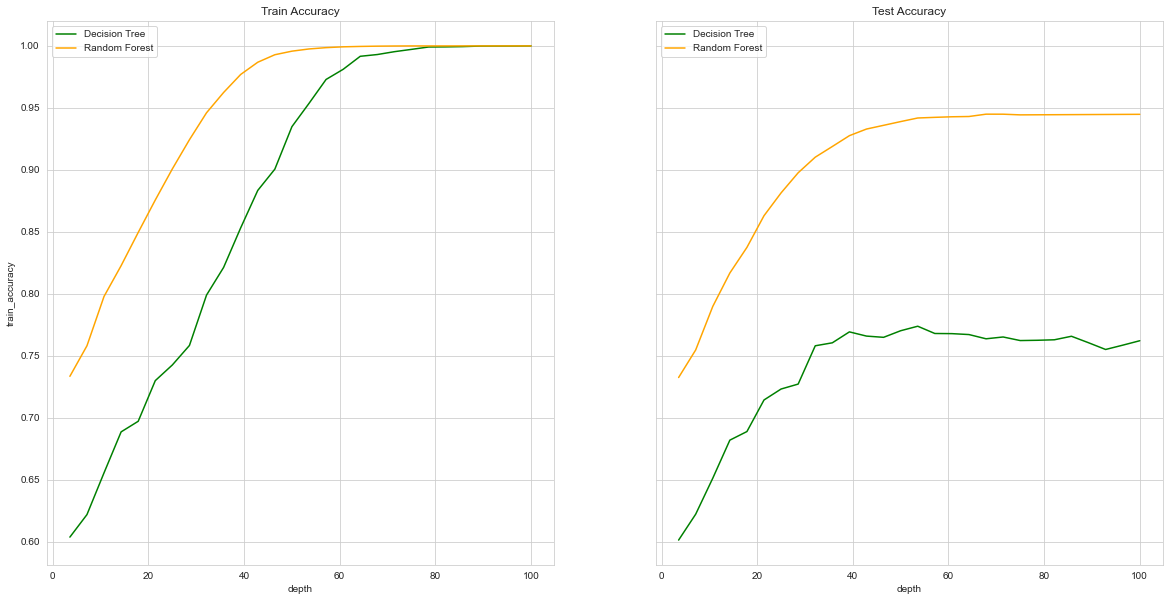

In [110]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20,10))
sns.lineplot(data=df_t, x='depth', y='train_accuracy', ax=axes[0], ci='sd', color='green');
sns.lineplot(data=df_rf, x='depth', y='train_accuracy', ax=axes[0], ci='sd', color='orange');
axes[0].set_title('Train Accuracy')
axes[0].legend(['Decision Tree', 'Random Forest'], loc="upper left")

sns.lineplot(data=df_t, x='depth', y='test_accuracy', ax=axes[1], ci='sd', color='green');
sns.lineplot(data=df_rf, x='depth', y='test_accuracy', ax=axes[1], ci='sd', color='orange');
axes[1].set_title('Test Accuracy')
axes[1].legend(['Decision Tree', 'Random Forest'], loc="upper left")
plt.show()

In [ ]:
from sklearn.datasets import make_classification
import random

random_state = 123
times = 33
samples = 100000
features = 50
proportion_informative = 0.8
proportion_missing = 0.1
proportion_w_nose = 0.8

output_tree = []
output_rf = []

for _ in range(times):
    print(_)
    # generate a binary classification dataset.
    X, y = make_classification(
        n_samples=samples,
        n_features=features,
        n_informative=round(features * proportion_informative),
        n_redundant=0,
        n_repeated=0,
    )
    # drop some columns
    cols_to_delete = random.sample(
        range(X.shape[1]), round(features * proportion_missing)
    )
    X = np.delete(X, cols_to_delete, 1)

    # split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

    # add noise
    X_test_shifted = X_test.copy()
    cols_to_add_noise = random.sample(
        range(X_test_shifted.shape[1]),
        round(X_test_shifted.shape[1] * proportion_w_nose),
    )
    for col in cols_to_add_noise:
        noise = np.random.normal(
            loc=0, scale=np.std(X_test_shifted[:, col]), size=X_test_shifted.shape[0],
        )
        X_test_shifted[:, col] += noise

    # build initial fully grown tree
    initial_tree = DecisionTreeClassifier(
        max_features="sqrt", random_state=random_state,
    )
    initial_tree_fit = initial_tree.fit(X_train, y_train)
    # get max depth
    max_depth = initial_tree_fit.tree_.max_depth
    # construct depth grid
    list_depths = np.arange(1, max_depth, 1).tolist()
    depth_pct = [100] + [(n / max_depth) * 100 for n in list_depths]

    # fit trees with smaller depth
    list_trees = [initial_tree_fit]
    for depth in list_depths:
        tmptree = DecisionTreeClassifier(
            max_depth=depth, max_features="sqrt", random_state=random_state
        )
        list_trees.append(tmptree.fit(X_train, y_train))

    train_accuracy = []
    test_accuracy = []
    shifted_test_accuracy = []

    for tree in list_trees:
        # calculate accuracy
        yhat_train = tree.predict(X_train)
        yhat_test = tree.predict(X_test)
        yhat_shifted_test = tree.predict(X_test_shifted)
        train_accuracy.append(accuracy_score(y_train, yhat_train))
        test_accuracy.append(accuracy_score(y_test, yhat_test))
        shifted_test_accuracy.append(accuracy_score(y_test, yhat_shifted_test))

    # save to pandas df
    df_t = pd.DataFrame(
        list(zip(depth_pct, train_accuracy, test_accuracy, shifted_test_accuracy)),
        columns=["depth", "train_accuracy", "test_accuracy", "shifted_test_accuracy"],
    )
    output_tree.append(df_t)

    # build initial forest
    initial_forest = RandomForestClassifier(
        max_features="sqrt", random_state=random_state
    )
    initial_forest_fit = initial_forest.fit(X_train, y_train)
    # get max depth
    max_depth_rf = max(
        [estimator.get_depth() for estimator in initial_forest_fit.estimators_]
    )
    # construct depth grid
    list_depths_rf = np.arange(1, max_depth_rf, 1).tolist()
    depth_pct_rf = [100] + [(n / max_depth_rf) * 100 for n in list_depths_rf]

    # fit rf with smaller depth
    list_forests = [initial_forest_fit]
    for depth in list_depths_rf:
        tmp_forest = RandomForestClassifier(
            max_features="sqrt", max_depth=depth, random_state=random_state
        )
        list_forests.append(tmp_forest.fit(X_train, y_train))

    train_accuracy_rf = []
    test_accuracy_rf = []
    shifted_test_accuracy_rf = []

    for forest in list_forests:
        # get accuracy for the forest
        yhat_train = forest.predict(X_train)
        yhat_test = forest.predict(X_test)
        yhat_shifted_test = forest.predict(X_test_shifted)
        train_accuracy_rf.append(accuracy_score(y_train, yhat_train))
        test_accuracy_rf.append(accuracy_score(y_test, yhat_test))
        shifted_test_accuracy_rf.append(accuracy_score(y_test, yhat_shifted_test))

    df_rf = pd.DataFrame(
        list(
            zip(
                depth_pct_rf,
                train_accuracy_rf,
                test_accuracy_rf,
                shifted_test_accuracy_rf,
            )
        ),
        columns=["depth", "train_accuracy", "test_accuracy", "shifted_test_accuracy"],
    )
    output_rf.append(df_rf)


In [ ]:
df_rf

In [ ]:
sns.lineplot(data=df_t, x="depth", y="train_accuracy")
sns.lineplot(data=df_rf, x="depth", y="train_accuracy")

In [ ]:
rf.feature_importances_ # be careful in the interpretation in case you have highly correlated features

In [ ]:
rf.feature_names_in_